In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
crime=pd.read_csv("E://data//crime_data.csv ")

In [4]:
crime.head(15)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime1=crime.drop(['States'],axis=1)

In [6]:
crime1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
#normalising the data
def normalisefunc(i):
    x=((i-i.min()) / (i.max()-i.min()))
    return (x)

In [8]:
crime_norm=normalisefunc(crime1)

In [9]:
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [10]:
#elbow curve
t=[]
k=list(range(2,8))
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(crime_norm)
    t.append(kmeans.inertia_)
t    

[6.596893867946198,
 5.010878493006417,
 3.690820410392112,
 3.184261813967723,
 2.9532661092254435,
 2.6250609069545794]

Text(0, 0.5, 'total_within_SS')

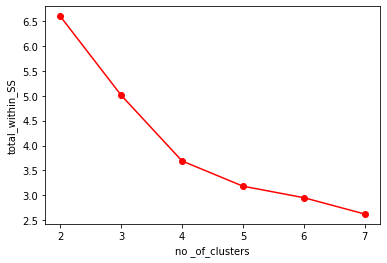

In [11]:
plt.plot(k ,t ,'ro-');plt.xlabel("no _of_clusters");plt.ylabel("total_within_SS")

In [12]:
model=KMeans(n_clusters=3)
model.fit(crime_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
model.labels_

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2])

In [15]:
final=pd.Series(model.labels_)
crime['clust']=final

In [16]:
crime.head()

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [17]:
crime=crime.iloc[:,[5,0,1,2,3,4]]

In [19]:
crime.iloc[:, 2:6].groupby(crime.clust).mean()


,Murder,Assault,UrbanPop,Rape
clust,,,,
0,12.331579,259.315789,68.315789,29.215789
1,3.600000,78.538462,52.076923,12.176923
2,6.016667,143.888889,72.333333,19.344444


In [ ]:
.to_csv("Kmeans_university.csv", encoding = "utf-8")

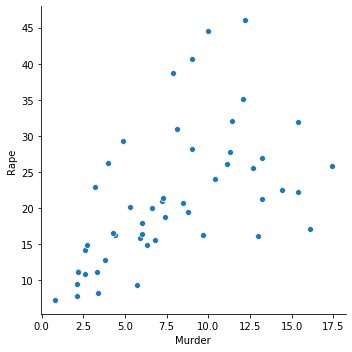

In [23]:
sns.relplot(x='Murder',y='Rape',data=crime)